In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


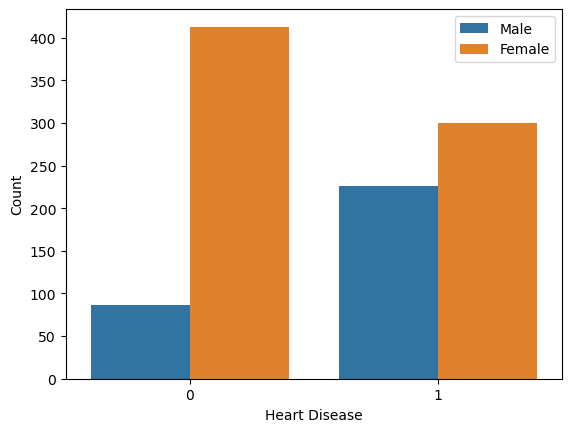

In [3]:
# Bar plot of target by sex
sns.countplot(x='target', hue='sex', data=df)
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.legend(['Male', 'Female'])
plt.show()


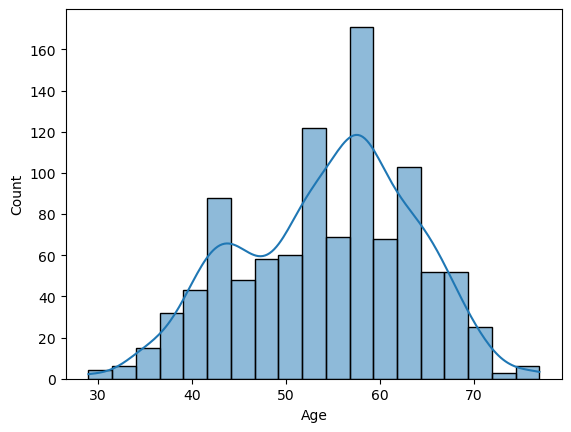

In [5]:
# Histogram of age
sns.histplot(x='age', data=df, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


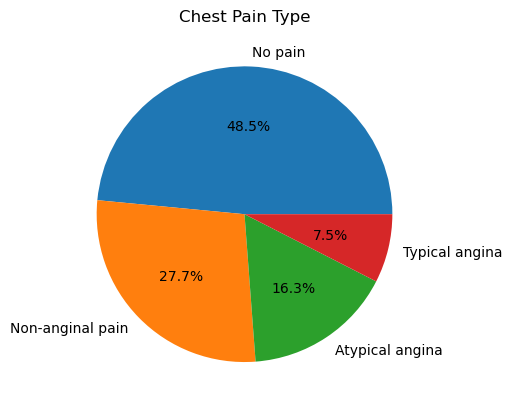

In [6]:
# Pie chart of cp
cp_counts = df['cp'].value_counts()
cp_labels = ['No pain', 'Non-anginal pain', 'Atypical angina', 'Typical angina']
plt.pie(cp_counts, labels=cp_labels, autopct='%1.1f%%')
plt.title('Chest Pain Type')
plt.show()


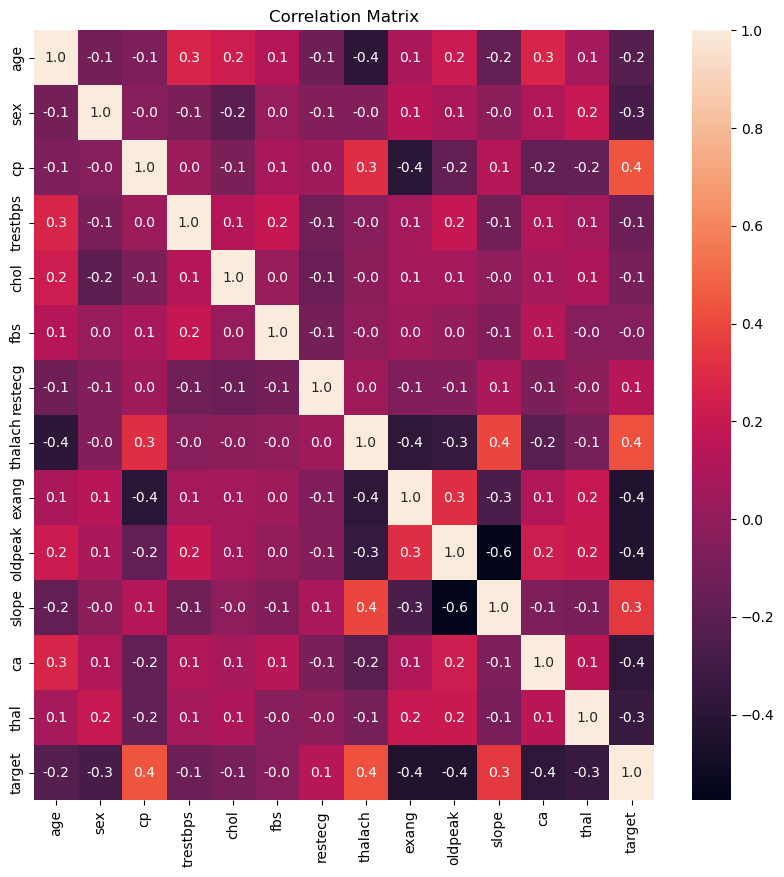

In [10]:
# Heatmap of correlation matrix
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True,fmt='.1f')
plt.title('Correlation Matrix')
plt.show()


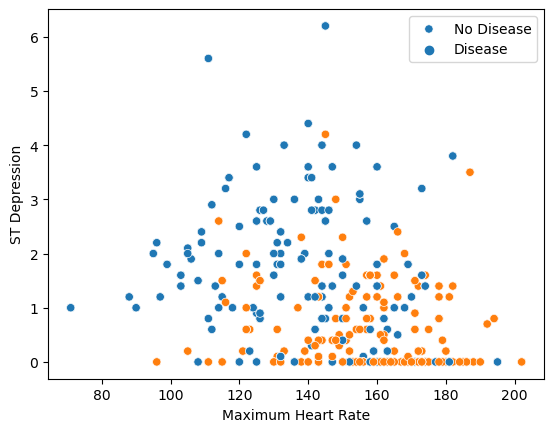

In [13]:
# Scatter plot of thalach and oldpeak
sns.scatterplot(x='thalach', y='oldpeak', hue='target', data=df)
plt.xlabel('Maximum Heart Rate')
plt.ylabel('ST Depression')
plt.legend(['No Disease', 'Disease'])
plt.show()


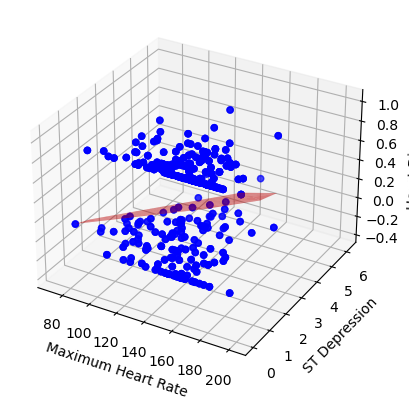

In [14]:
# Multiple linear regression plot
X = df[['thalach', 'oldpeak']]
y = df['target']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['thalach'], X['oldpeak'], y, c='b', marker='o')
ax.plot_trisurf(X['thalach'], X['oldpeak'], y_pred, color='r', alpha=0.5)
ax.set_xlabel('Maximum Heart Rate')
ax.set_ylabel('ST Depression')
ax.set_zlabel('Heart Disease')
plt.show()


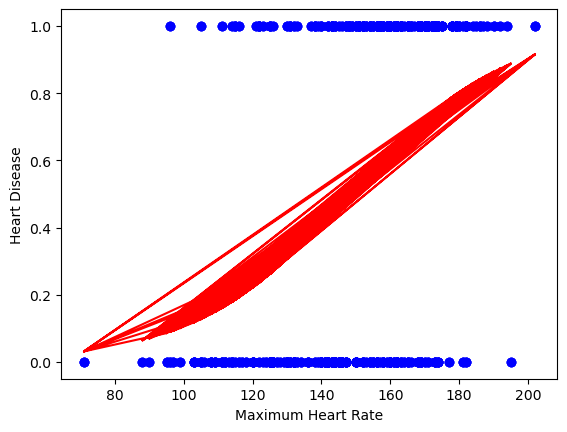

In [15]:
# Logistic regression plot
X = df['thalach'].values.reshape(-1, 1)
y = df['target']
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict_proba(X)[:, 1]
plt.scatter(X, y, c='b', marker='o')
plt.plot(X, y_pred, c='r')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Heart Disease')
plt.show()


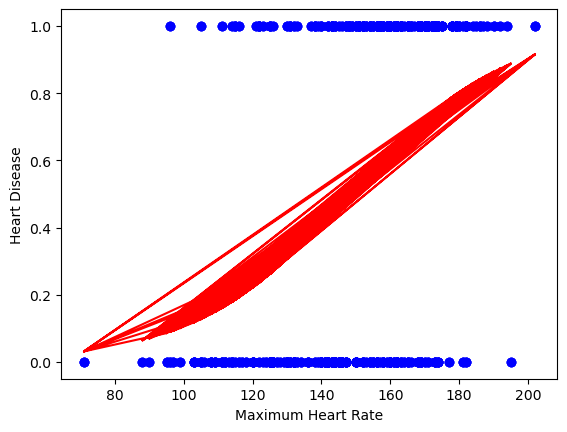

In [17]:
# Logistic regression plot
X = df['thalach'].values.reshape(-1, 1)
y = df['target']
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict_proba(X)[:, 1]
plt.scatter(X, y, c='b', marker='o')
plt.plot(X, y_pred, c='r')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Heart Disease')
plt.show()


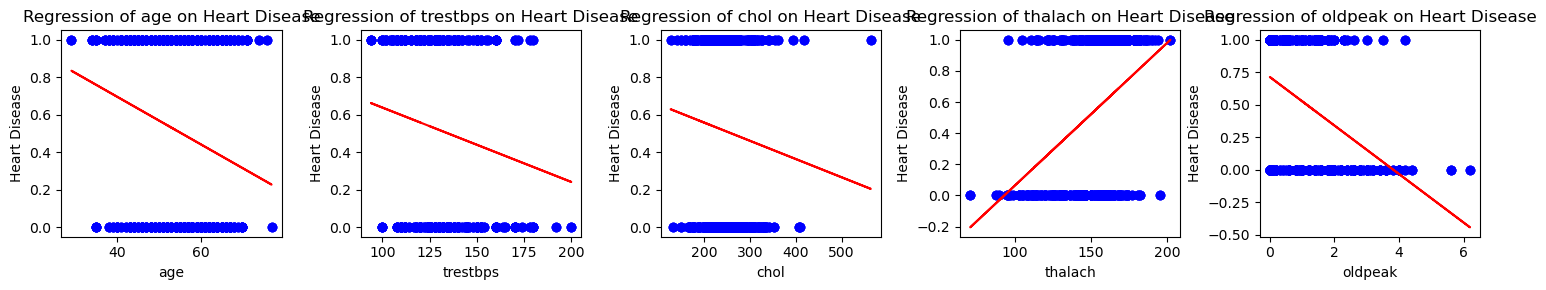

In [18]:
# Define the y variable
y = df['target']

# Define the x variables
x_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create a figure with 5 subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Loop through the x variables and plot the scatter plot with regression line
for i, x_var in enumerate(x_vars):
    # Define the x variable
    X = df[x_var].values.reshape(-1, 1)
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict the y values
    y_pred = model.predict(X)
    
    # Plot the scatter plot
    axes[i].scatter(X, y, c='b', marker='o')
    
    # Plot the regression line
    axes[i].plot(X, y_pred, c='r')
    
    # Set the labels and title
    axes[i].set_xlabel(x_var)
    axes[i].set_ylabel('Heart Disease')
    axes[i].set_title(f'Regression of {x_var} on Heart Disease')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

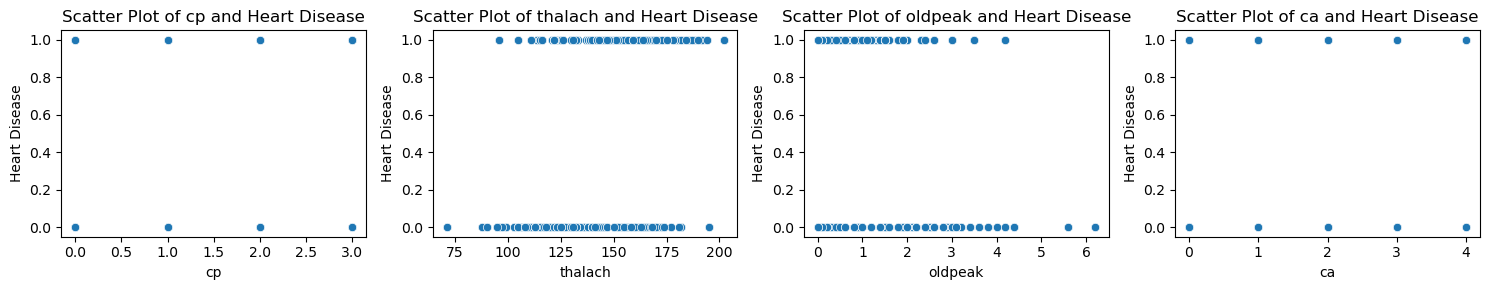

In [19]:
# Define the target variable
y = df['target']

# Define the important variables
x_vars = ['cp', 'thalach', 'oldpeak', 'ca']

# Create a figure with 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 3))

# Loop through the important variables and plot the scatter plot
for i, x_var in enumerate(x_vars):
    # Define the x variable
    X = df[x_var]
    
    # Plot the scatter plot
    sns.scatterplot(x=X, y=y, ax=axes[i])
    
    # Set the labels and title
    axes[i].set_xlabel(x_var)
    axes[i].set_ylabel('Heart Disease')
    axes[i].set_title(f'Scatter Plot of {x_var} and Heart Disease')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()